In [1]:
# データセットを読み込み
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.linear_subgrad_svm import LinearSubgradSVM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_generator.clustered_data_generator import ClusteredDataGenerator
from tools.utils.plot.cluster_plot import ClusterPlotter
from tools.utils.plot.learning_curve_plot import LearningCurvePlotter

In [2]:
SEED=1
learning_curve_plotter=LearningCurvePlotter()

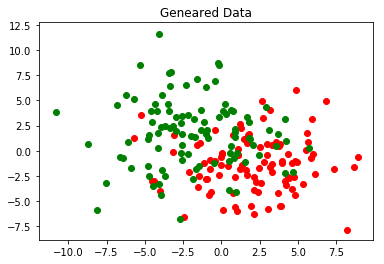

iter 1000 loss 138.10871753061315
Converged! loss 132.69266582079513
85.00 %


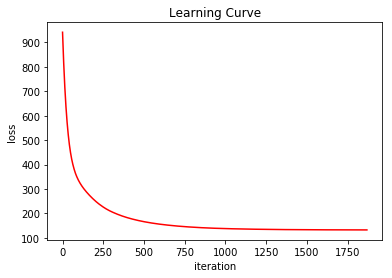

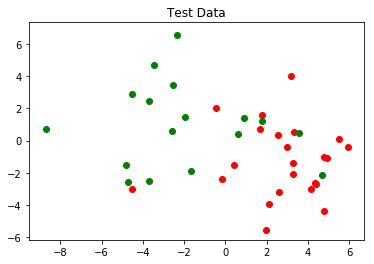

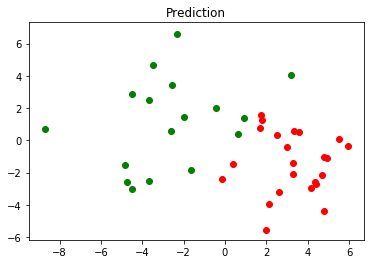

In [4]:
# 人工データ

## 生成
expand_rate=10
mus=np.array([[2,-2],[-2,2]])
sigmas=np.array([expand_rate*np.eye(2),expand_rate*np.eye(2)])
data_gen=ClusteredDataGenerator(mus,sigmas)
X,y=data_gen.run(100)

## 可視化

cluster_plotter=ClusterPlotter()
cluster_plotter.plot(X,y,"Geneared Data")

## 前処理
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=SEED)

## 学習

model=LinearSubgradSVM(lam=1, lr=0.00001, max_iter=100000, epsilon=0.0001,seed=SEED)
losses=model.fit(X_train,y_train)
learning_curve_plotter.plot(losses)

## 評価
acc=model.evaluate(X_test,y_test)
print(f"{acc*100:.2f} %")
y_test[y_test==-1]=0
pred=model.predict(X_test)
pred[pred==-1]=0
cluster_plotter.plot(X_test,y_test,title="Test Data")
cluster_plotter.plot(X_test,pred,title="Prediction")

In [5]:
# 実データ (結構な確率でloss nanになるので一旦保留)
cancer = load_breast_cancer()
data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.tail(10)
X=data_df.values
y=cancer.target
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=SEED)

model=LinearSubgradSVM(lam=0.01, lr=0.000001, max_iter=50000, epsilon=0.00001,seed=SEED)
losses=model.fit(X_train,y_train)
learning_curve_plotter.plot(losses)

acc=model.evaluate(X_test,y_test)
print(f"{acc*100:.2f} %")

../tools/models/classifiers/linear_subgrad_svm.py:31: RuntimeWarning: invalid value encountered in subtract
  theta_next = theta - self.lr * self.grad(phi, y, theta, K)
../tools/models/classifiers/linear_subgrad_svm.py:50: RuntimeWarning: invalid value encountered in greater
  if sum(scores > 0) > 0:


iter 1000 loss nan
iter 2000 loss nan
iter 3000 loss nan
iter 4000 loss nan
iter 5000 loss nan


KeyboardInterrupt: 